In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/olist_orders_dataset.csv", parse_dates=["order_purchase_timestamp",
                                                                  "order_approved_at",
                                                                  "order_delivered_carrier_date",
                                                                  "order_delivered_customer_date",
                                                                  "order_estimated_delivery_date"
                                                                 ]).dropna(how="all")
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04


In [3]:
delivered_df = df[df.order_delivered_customer_date.notna()]
delivered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96476 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96476 non-null  object        
 1   customer_id                    96476 non-null  object        
 2   order_status                   96476 non-null  object        
 3   order_purchase_timestamp       96476 non-null  datetime64[ns]
 4   order_approved_at              96462 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96475 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96476 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [9]:
#Zpoždění mezi očekávaným datem doručení a skutečným datem doručení
#kladné číslo - objednávaka dorazila dříve
#0 - objendávka dorazila v očekávané datum
#záporné číslo - objednávka dorazila později
delivered_df = delivered_df.assign(
    delay_days=(delivered_df.order_delivered_customer_date - delivered_df.order_estimated_delivery_date).dt.days
)
delivered_df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delay_days,delivery_performance
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,-8,Early
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,-6,Early
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,-18,Early


In [11]:
#Kategorizace zpoždění
def categorize_delay(delay_days):
    # print(delay_days)
    if delay_days < 0:
        return "Early"
    elif delay_days == 0:
        return "On time"
    return "Late"

delivered_df = delivered_df.assign(
    delivery_performance = delivered_df["delay_days"].apply(categorize_delay)
)
delivered_df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delay_days,delivery_performance
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,-8,Early
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,-6,Early
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,-18,Early


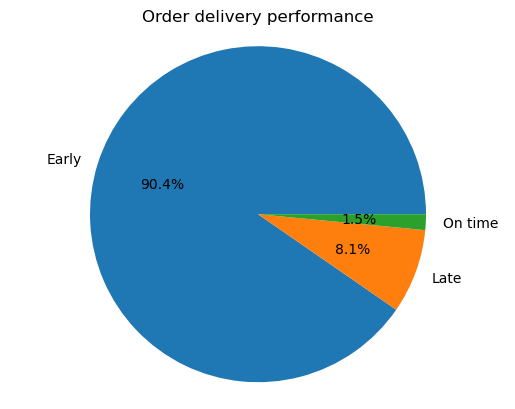

In [6]:
#Vizualizace
delivery_performance_counts = delivered_df.delivery_performance.value_counts()
delivery_performance_counts.plot(kind="pie", startangle=0, ylabel="", autopct="%1.1f%%")
plt.title("Order delivery performance")
plt.axis("equal")
plt.legend().remove()
plt.show()